In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast            
import numpy as np 
import seaborn as sns
import re

cols_march = [
"appid",
"name",
"release_date",
"required_age",
"price",
"dlc_count",
"detailed_description",
"about_the_game",
"short_description",
"reviews",
"header_image",
"website",
"support_url",
"support_email",
"windows",
"mac",
"linux",
"metacritic_score",
"metacritic_url",
"achievements",
"recommendations",
"notes",
"supported_languages",
"full_audio_languages",
"packages",
"developers",
"publishers",
"categories",
"genres",
"screenshots",
"movies",
"user_score",
"score_rank",
"positive",
"negative",
"estimated_owners",
"average_playtime_forever",
"average_playtime_2weeks",
"median_playtime_forever",
"median_playtime_2weeks",
"discount",
"peak_ccu",
"tags",
"pct_pos_total",
"num_reviews_total",
"pct_pos_recent",
"num_reviews_recent"
]


cols_may = [
"AppID",
"name",
"release_date",
"required_age",
"price",
"dlc_count",
"detailed_description",
"about_the_game",
"short_description",
"reviews",
"header_image",
"website",
"support_url",
"support_email",
"windows",
"mac",
"linux",
"metacritic_score",
"metacritic_url",
"achievements",
"recommendations",
"notes",
"supported_languages",
"full_audio_languages",
"packages",
"developers",
"publishers",
"categories",
"genres",
"screenshots",
"movies",
"user_score",
"score_rank",
"positive",
"negative",
"estimated_owners",
"average_playtime_forever",
"average_playtime_2weeks",
"median_playtime_forever",
"median_playtime_2weeks",
"peak_ccu",
"tags",
"pct_pos_total",
"num_reviews_total",
"pct_pos_recent",
"num_reviews_recent"
]

df_march = pd.read_csv(
    "games_march2025_cleaned.csv",
    header=0,
    names=cols_march   
)

df_may = pd.read_csv(
    "games_may2024_cleaned.csv",
    header=0,
    names=cols_may     
)

df_may = df_may.rename(columns={"AppID": "appid"})


In [2]:
df_may["discount"] = 0  #df_may hat diese Spalte nicht 

In [3]:
master_order = cols_march          
df_may = df_may[master_order]
df_all = pd.concat([df_march, df_may], ignore_index=True)   #konkateniere die beiden Datasets.


In [4]:
print(df_all.shape)          
print(df_all["appid"].nunique(), "unique apps")
print(df_all.isnull().mean().sort_values(ascending=False).head(10)) 


(173264, 47)
98528 unique apps
score_rank              0.999538
metacritic_url          0.956788
reviews                 0.880621
notes                   0.821936
website                 0.533233
support_url             0.502545
support_email           0.123505
about_the_game          0.002355
detailed_description    0.002095
short_description       0.001322
dtype: float64


In [5]:
df_all = df_all.drop_duplicates(subset="appid", keep="first")    #Wir behalten nur die Einträge, die einzigartig sind. Möglicherweise nicht die beste Idee.
df_all.to_csv("games_march_to_may_2024_2025_merged.csv", index=False)
df = df_all


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98528 entries, 0 to 173248
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     98528 non-null  int64  
 1   name                      98525 non-null  object 
 2   release_date              98528 non-null  object 
 3   required_age              98528 non-null  int64  
 4   price                     98528 non-null  float64
 5   dlc_count                 98528 non-null  int64  
 6   detailed_description      98305 non-null  object 
 7   about_the_game            98282 non-null  object 
 8   short_description         98385 non-null  object 
 9   reviews                   11165 non-null  object 
 10  header_image              98528 non-null  object 
 11  website                   44742 non-null  object 
 12  support_url               48004 non-null  object 
 13  support_email             86199 non-null  object 
 14  windows   

In [7]:
df.describe()

,appid,required_age,price,dlc_count,metacritic_score,achievements,recommendations,user_score,score_rank,positive,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
count,9.852800e+04,98528.000000,98528.000000,98528.000000,98528.000000,98528.000000,9.852800e+04,98528.000000,41.000000,9.852800e+04,...,9.852800e+04,98528.000000,9.852800e+04,98528.000000,98528.000000,9.852800e+04,98528.000000,9.852800e+04,98528.000000,98528.000000
mean,1.649300e+06,0.199456,7.323752,0.575775,3.047134,19.766686,9.792180e+02,0.031808,99.170732,1.228685e+03,...,1.102106e+02,4.860507,1.089462e+02,5.111207,4.146385,9.216774e+01,45.546434,1.312768e+03,5.283899,14.998457
std,8.947109e+05,1.801254,13.230560,14.672119,14.812261,156.188230,2.121478e+04,1.600575,0.703649,3.054515e+04,...,6.503189e+03,174.743647,8.401065e+03,182.758018,15.826629,5.456588e+03,40.752929,3.400242e+04,22.430301,425.917775
min,1.000000e+01,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,8.905850e+05,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,99.000000,1.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
50%,1.575460e+06,0.000000,4.990000,0.000000,0.000000,4.000000,0.000000e+00,0.000000,99.000000,1.000000e+01,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,60.000000,1.500000e+01,-1.000000,-1.000000
75%,2.367620e+06,0.000000,9.990000,0.000000,0.000000,20.000000,0.000000e+00,0.000000,100.000000,5.700000e+01,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,84.000000,8.100000e+01,-1.000000,-1.000000
max,3.542350e+06,21.000000,999.980000,3427.000000,97.000000,9821.000000,4.401572e+06,100.000000,100.000000,7.480813e+06,...,1.462997e+06,18568.000000,1.462997e+06,18568.000000,100.000000,1.212356e+06,100.000000,8.632939e+06,100.000000,96473.000000


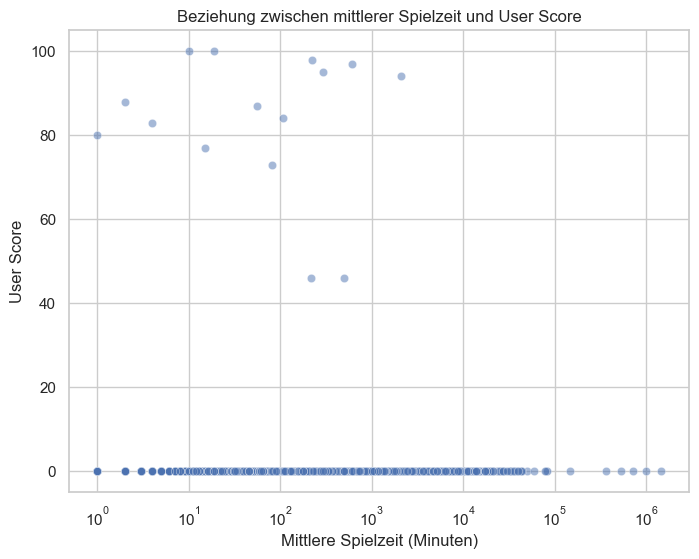

In [8]:
#Spiele mit einer höheren durchschnittlichen Spielzeit erhalten im Schnitt höhere Bewertungen.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("ggplot")
sns.set_theme(style="whitegrid")

#df_plot = df[df["user_score"] >= 1]    # 0 ausschliessen          
#df_plot = df[df["price"] <= 400]         



plt.figure(figsize=(8,6))
sns.scatterplot(
data=df,
x="average_playtime_forever",
y="user_score",
alpha=0.5
)
plt.title("Beziehung zwischen mittlerer Spielzeit und User Score")
plt.xlabel("Mittlere Spielzeit (Minuten)")
plt.ylabel("User Score")

plt.xscale("log")   

plt.show()

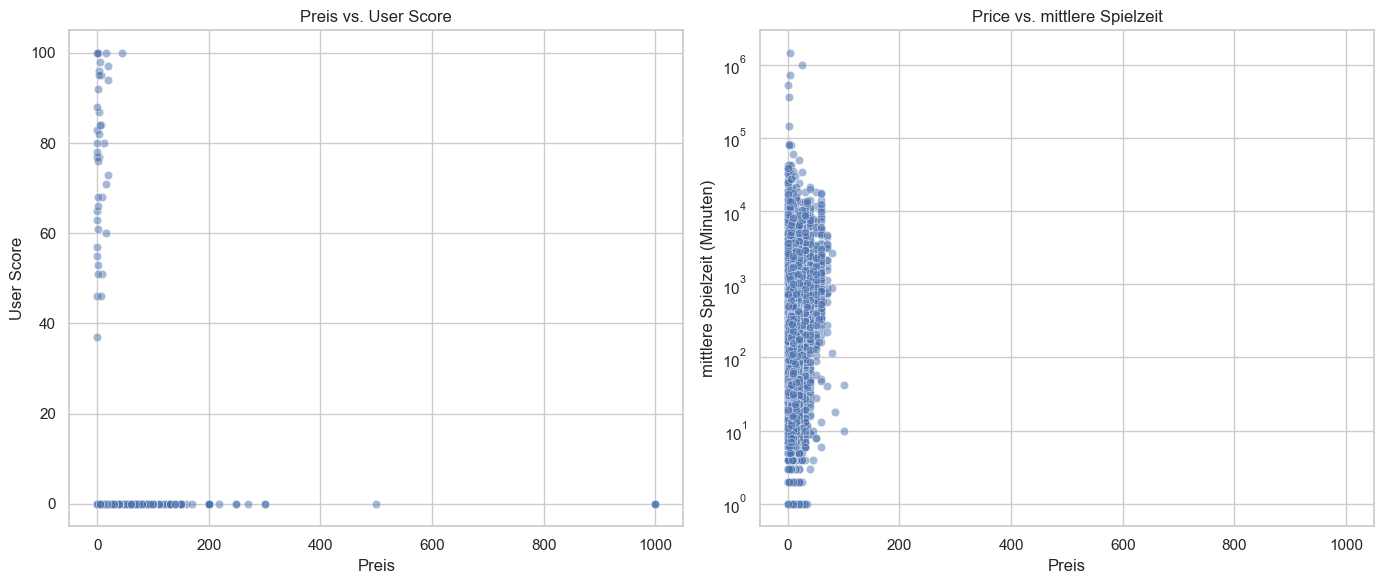

In [9]:
#Teurere Spiele erhalten im Schnitt höhere Bewertungen oder werden im Schnitt häufiger gespielt.

fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(
data=df,
x="price",
y="user_score",
alpha=0.5,
ax=axes[0]
)
axes[0].set_title("Preis vs. User Score")
axes[0].set_xlabel("Preis")
axes[0].set_ylabel("User Score")

sns.scatterplot(
data=df,
x="price",
y="average_playtime_forever",
alpha=0.5,
ax=axes[1]
)
axes[1].set_title("Price vs. mittlere Spielzeit")
axes[1].set_xlabel("Preis")
axes[1].set_ylabel("mittlere Spielzeit (Minuten)")

axes[1].set_yscale("log")

plt.tight_layout()
plt.show()

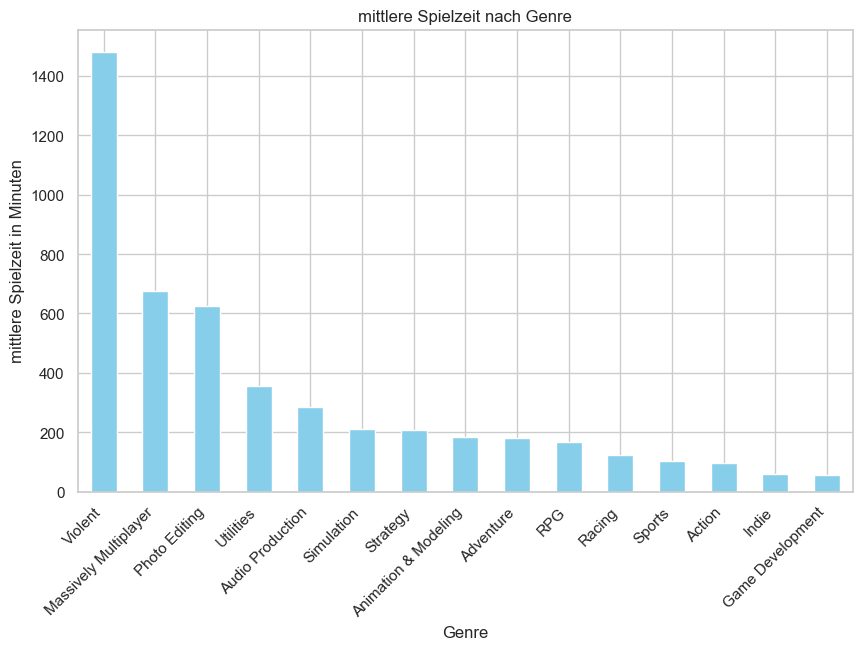

In [10]:
#Das Genre ‘Action’ hat die meisten Spieler.
import ast

def parse_genre_list(x):    #Gib den ersten Wert der Liste von Genre zurück.
    try:
        if isinstance(x, str):
            genres = ast.literal_eval(x)
            if isinstance(genres, list) and len(genres) > 0:
                return genres[0]  
            elif isinstance(genres, str):
                return genres  
        return None
    except (ValueError, SyntaxError):
        return None

df["main_genre"] = df["genres"].apply(parse_genre_list)


df = df.dropna(subset=["main_genre"])   #Entferne alle Einträge, die None sind.

genre_playtime = (
df.groupby("main_genre")["average_playtime_forever"]
.mean()
.sort_values(ascending=False)
.head(15)
)

plt.figure(figsize=(10,6))
genre_playtime.plot(kind="bar", color="skyblue")
plt.title("mittlere Spielzeit nach Genre")
plt.xlabel("Genre")
plt.ylabel("mittlere Spielzeit in Minuten")
plt.xticks(rotation=45, ha="right")
plt.show()

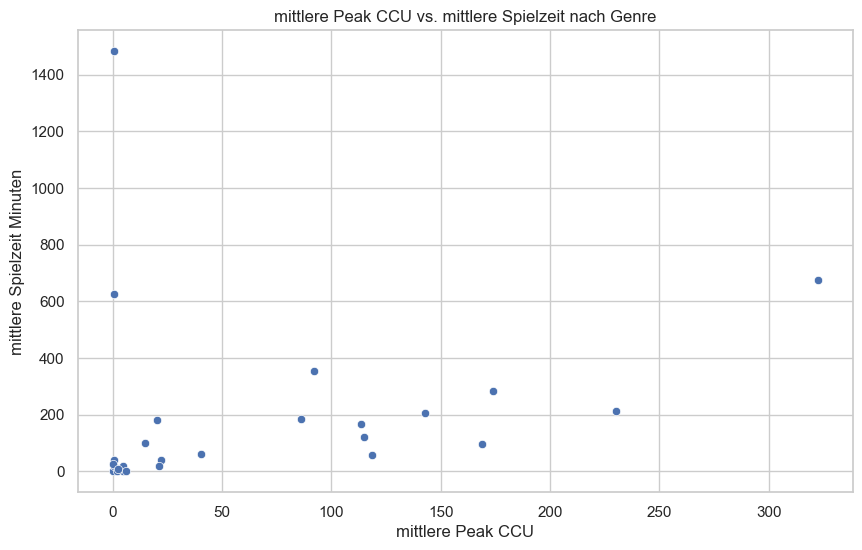

In [11]:
#Das Genre mit dem höchsten Peak-CCU hat auch die höchste Spielerzahl.

genre_ccu = df.groupby("main_genre")["peak_ccu"].mean().sort_values(ascending=False)
genre_players = df.groupby("main_genre")["average_playtime_forever"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.scatterplot(
x=genre_ccu,
y=genre_players
)
plt.title("mittlere Peak CCU vs. mittlere Spielzeit nach Genre")
plt.xlabel("mittlere Peak CCU")
plt.ylabel("mittlere Spielzeit Minuten")
plt.show()

C:\Users\silva\AppData\Local\Temp\ipykernel_4860\3124440863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
C:\Users\silva\AppData\Local\Temp\ipykernel_4860\3124440863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["release_year"] = df["release_date"].dt.year


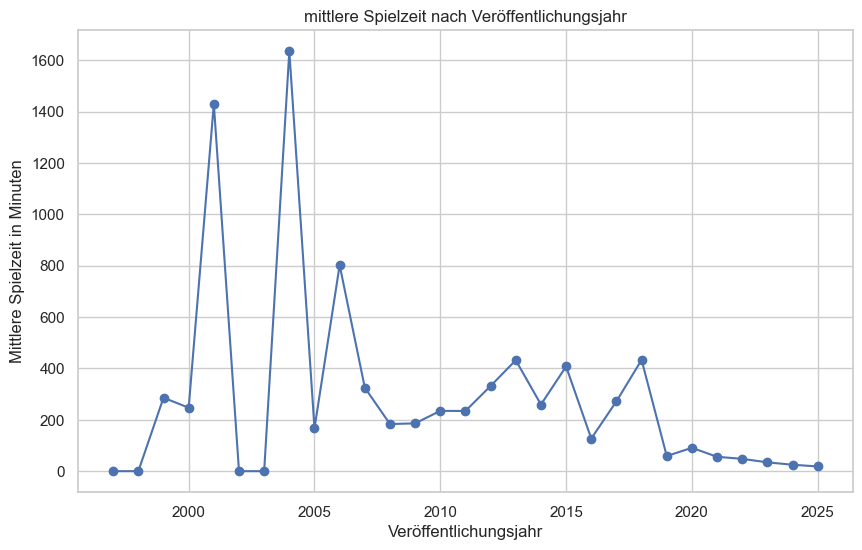

In [12]:
# Es gibt ältere Spiele, deren durchschnittliche Spielhäufigkeit höher ist, als die von neueren Spielen.

df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"] = df["release_date"].dt.year

year_playtime = (
df.groupby("release_year")["average_playtime_forever"]
.mean()
.dropna()
)

plt.figure(figsize=(10,6))
plt.plot(year_playtime.index, year_playtime.values, marker="o")
plt.title("mittlere Spielzeit nach Veröffentlichungsjahr")
plt.xlabel("Veröffentlichungsjahr")
plt.ylabel("Mittlere Spielzeit in Minuten")
plt.show()


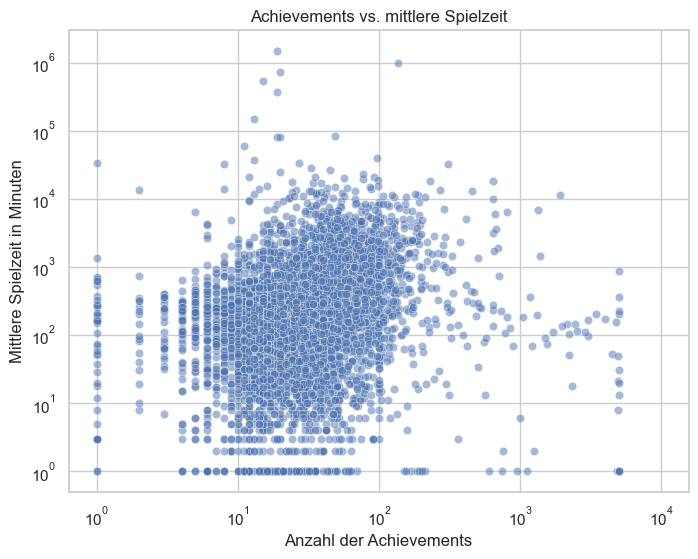

In [13]:
# Je mehr Achievements das Spiel hat, desto länger ist die durchschnittliche Spielzeit

plt.figure(figsize=(8,6))
sns.scatterplot(
data=df,
x="achievements",
y="average_playtime_forever",
alpha=0.5
)
plt.title("Achievements vs. mittlere Spielzeit")
plt.xlabel("Anzahl der Achievements")
plt.ylabel("Mittlere Spielzeit in Minuten")
plt.yscale("log")
plt.xscale("log")
plt.show()

C:\Users\silva\AppData\Local\Temp\ipykernel_4860\2197055635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_free"] = df["price"] == 0


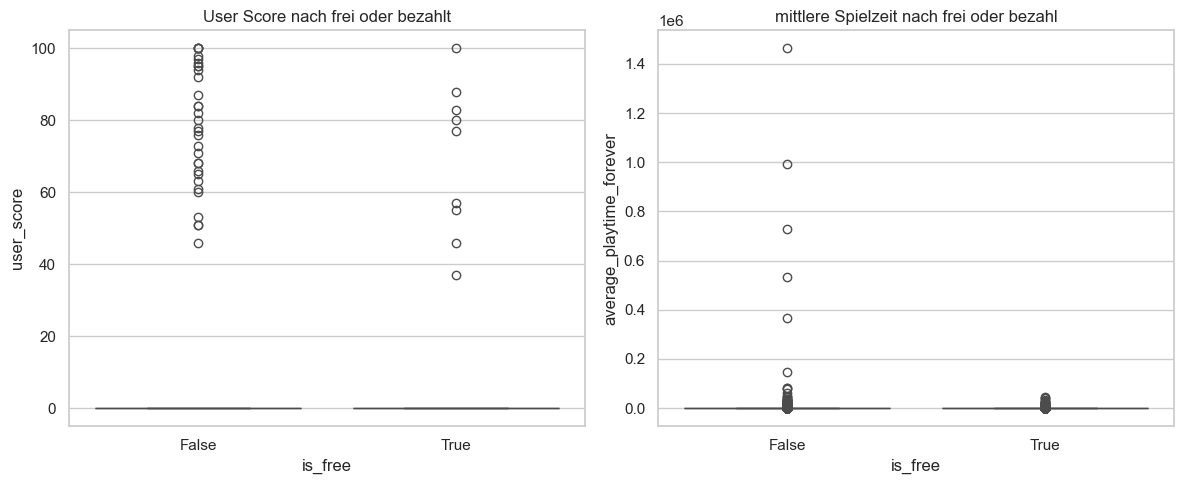

In [14]:
#Was ist besser, bezahlt oder gratis?

df["is_free"] = df["price"] == 0

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(
data=df,
x="is_free",
y="user_score",
ax=axes[0]
)
axes[0].set_title("User Score nach frei oder bezahlt")

sns.boxplot(
data=df,
x="is_free",
y="average_playtime_forever",
ax=axes[1]
)
axes[1].set_title("mittlere Spielzeit nach frei oder bezahl")

plt.tight_layout()
plt.show()

C:\Users\silva\AppData\Local\Temp\ipykernel_4860\1683962171.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["main_genre"] = df["genres"].apply(parse_genre_list)


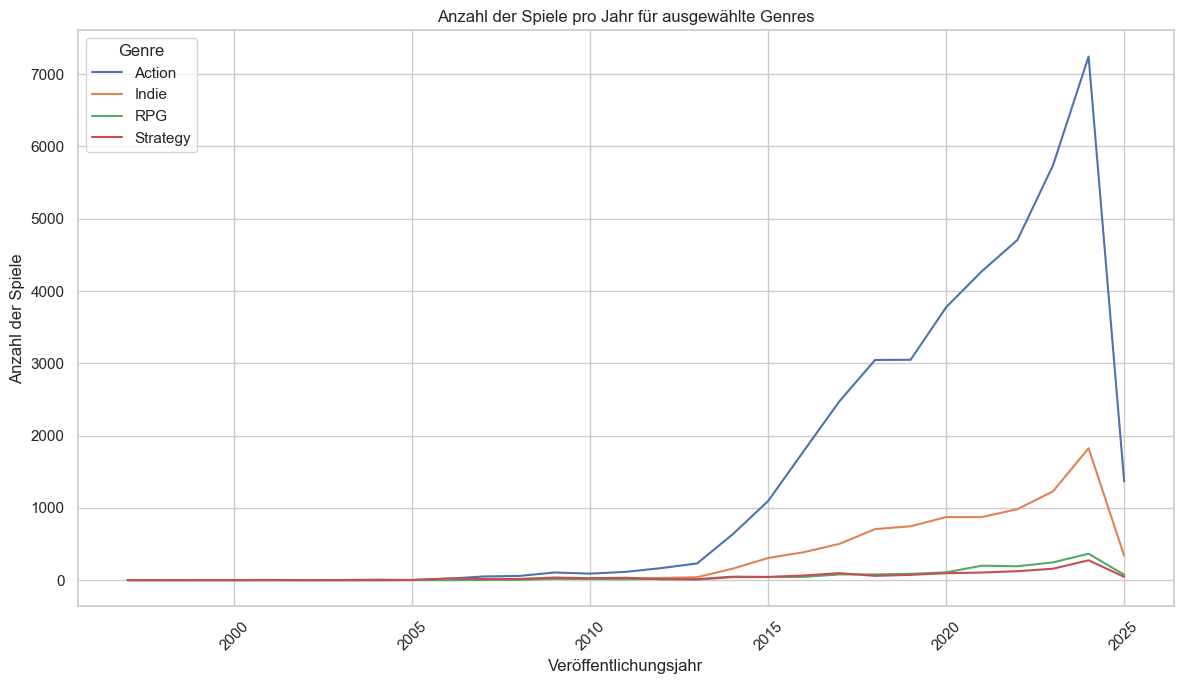

In [15]:
#Hinzukommen von neuen Spielen pro Genre
import pandas as pd
import matplotlib.pyplot as plt

import ast

def parse_genre_list(x):
    try:
        if isinstance(x, str):
            genres = ast.literal_eval(x)
            if isinstance(genres, list) and len(genres) > 0:
                return genres[0]
            elif isinstance(genres, str):
                return genres
        return None
    except (ValueError, SyntaxError):
        return None

df["main_genre"] = df["genres"].apply(parse_genre_list)
df = df.dropna(subset=["main_genre"])

df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"] = df["release_date"].dt.year

genres_of_interest = ["Action", "Indie", "RPG", "Strategy"] #Spezifisch diese Kategorien für die Übersicht.
df_g = df[df["main_genre"].isin(genres_of_interest)]

df_g = df_g.dropna(subset=["release_year"])

#df_g = df_g[df_g["release_year"] >= 2010]  
#df_g = df_g[df_g["release_year"] >= 2025]  

count_per_year = (
    df_g
    .groupby(["release_year", "main_genre"])
    .size()
    .unstack(fill_value=0)   
)

count_per_year = count_per_year.sort_index()

plt.figure(figsize=(12, 7))
for genre in genres_of_interest:
    if genre in count_per_year.columns:
        plt.plot(count_per_year.index, count_per_year[genre], label=genre)

plt.title("Anzahl der Spiele pro Jahr für ausgewählte Genres")
plt.xlabel("Veröffentlichungsjahr")
plt.ylabel("Anzahl der Spiele")
plt.legend(title="Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

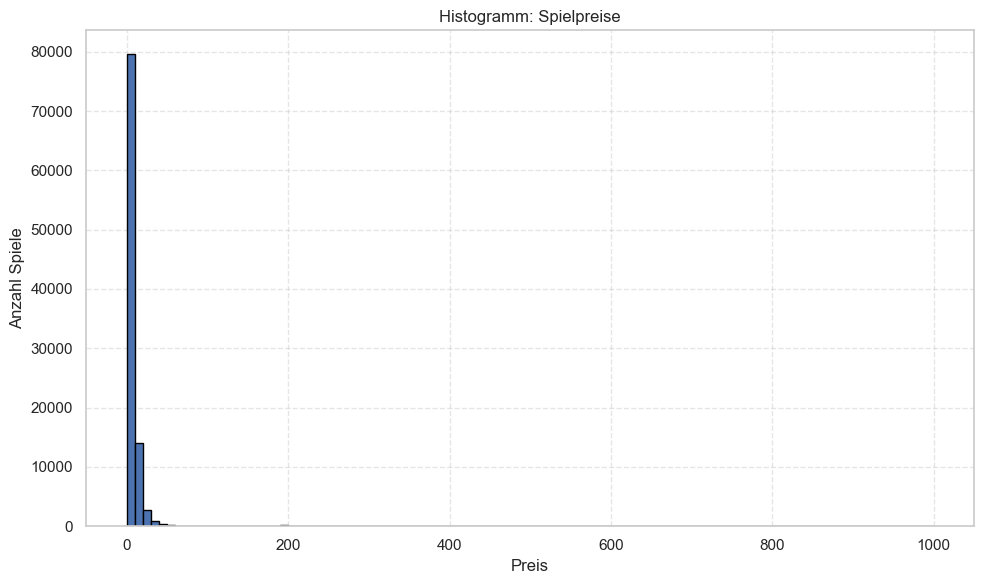

In [19]:
import matplotlib.pyplot as plt
import numpy as np

data = df["price"]

plt.figure(figsize=(10, 6))
plt.hist(data, bins=100, edgecolor="black")
plt.title("Histogramm: Spielpreise")
plt.xlabel("Preis")
plt.ylabel("Anzahl Spiele")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


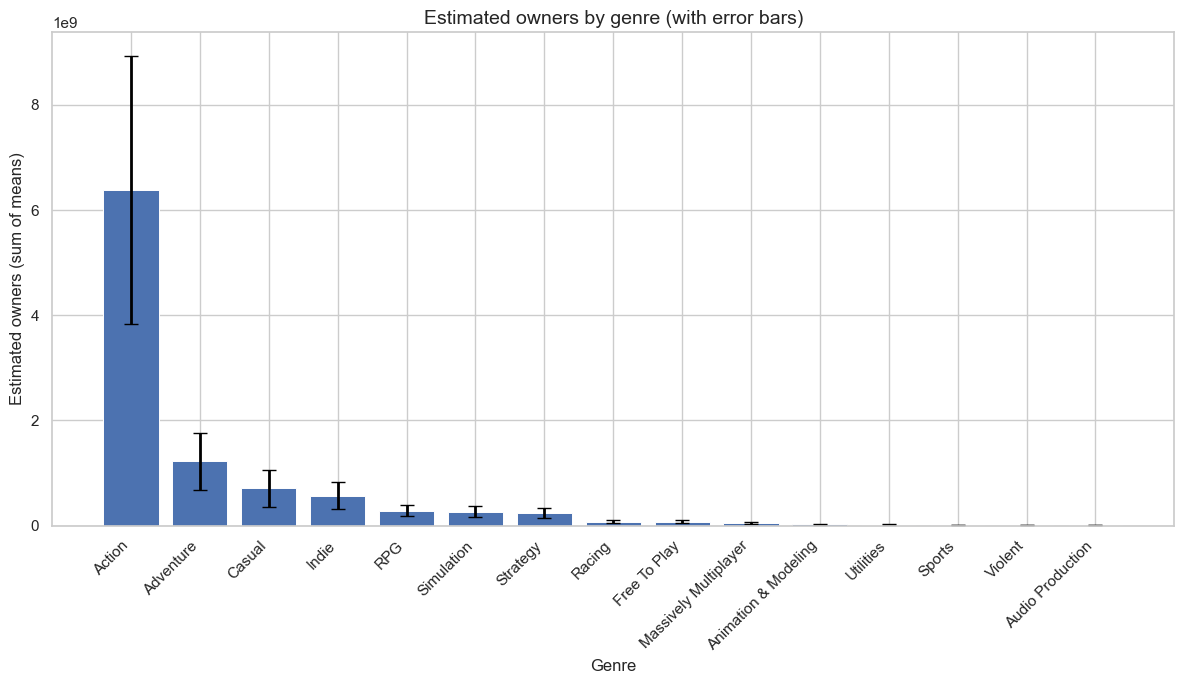

In [ ]:
def parse_genre_list(x):
    if isinstance(x, str):
        try:
            genres = ast.literal_eval(x)
            return genres[0] if isinstance(genres, list) and genres else genres
        except (ValueError, SyntaxError):
            pass
    return None

def parse_estimated_owners_range(x):   
    """Nutze regex um zu prüfen ob x das Format '100,000 - 200,000' hat. 
    Wenn ja, dann nimm die Zahlen auseinander und berechne auch den Mittelwert. """

    if isinstance(x, str):
        m = re.match(r'\s*([\d,]+)\s*-\s*([\d,]+)', x)
        if m:
            low = float(m.group(1).replace(",", ""))
            high = float(m.group(2).replace(",", ""))
            return (low, high, (low + high) / 2.0)
        clean = x.replace(",", "").strip()
        if clean.isdigit():
            v = float(clean)
            return (v, v, v)
    return (np.nan, np.nan, np.nan)

df_exp = df.copy()
df_exp["genre_list"] = df_exp["genres"].apply(parse_genre_list)
df_exp = df_exp.explode("genre_list").dropna(subset=["genre_list"])

df_exp[["est_low", "est_high", "est_mean"]] = pd.DataFrame(df_exp["estimated_owners"].apply(parse_estimated_owners_range).tolist(), index=df_exp.index)

genre_stats = df_exp.groupby("genre_list", as_index=False).agg(
    est_mean_sum=("est_mean", "sum"),
    est_low_sum=("est_low", "sum"),
    est_high_sum=("est_high", "sum")
)

genre_stats["err_minus"] = genre_stats["est_mean_sum"] - genre_stats["est_low_sum"]
genre_stats["err_plus"] = genre_stats["est_high_sum"] - genre_stats["est_mean_sum"]

genre_stats = genre_stats.sort_values("est_mean_sum", ascending=False).head(15)

plt.figure(figsize=(12, 7))
bars = plt.bar(range(len(genre_stats)), genre_stats["est_mean_sum"], edgecolor="white", linewidth=0.7)
plt.errorbar(
    range(len(genre_stats)),
    genre_stats["est_mean_sum"],
    yerr=[genre_stats["err_minus"], genre_stats["err_plus"]],
    fmt="none",
    ecolor="black",
    elinewidth=2,
    capsize=5
)
plt.xticks(range(len(genre_stats)), genre_stats["genre_list"], rotation=45, ha="right")
plt.ylabel("Estimated owners (sum of means)", fontsize=12)
plt.xlabel("Genre", fontsize=12)
plt.title("Estimated owners by genre (with error bars)", fontsize=14)

plt.tight_layout()
plt.show()